<a href="https://www.kaggle.com/code/bindusrivalli/data-vizualization?scriptVersionId=159646543" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv


In [2]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [3]:
my_filepath1 = "/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv"
my_data1=pd.read_csv(my_filepath1)
my_data1.head()


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
my_data1.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [5]:
missing_val_count_by_column = (my_data1.isnull().sum())
print(missing_val_count_by_column)

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


In [6]:
from sklearn.preprocessing import OrdinalEncoder

ordinal=OrdinalEncoder()
encoded_data=ordinal.fit_transform(my_data1)
full_data = pd.DataFrame(encoded_data, columns=my_data1.columns)
full_data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,0.0,1.0,46.0,1.0,93.0,1.0,1.0,14.0,2.0,0.0,9.0,1.0,64.0,1.0,19.0
1,1.0,1.0,82.0,0.0,79.0,1.0,2.0,74.0,2.0,1.0,74.0,0.0,153.0,1.0,0.0
2,2.0,1.0,42.0,0.0,51.0,0.0,0.0,27.0,0.0,0.0,55.0,0.0,50.0,1.0,12.0
3,3.0,1.0,22.0,0.0,14.0,0.0,2.0,3.0,2.0,0.0,37.0,1.0,72.0,0.0,NaN
4,4.0,1.0,98.0,0.0,70.0,0.0,1.0,65.0,0.0,0.0,96.0,0.0,28.0,1.0,39.0


## **Data leakage**

In [7]:
full_data['salary_mark'] = full_data['salary'].apply(lambda x: 0 if pd.isna(x) else 1)
full_data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,salary_mark
0,0.0,1.0,46.0,1.0,93.0,1.0,1.0,14.0,2.0,0.0,9.0,1.0,64.0,1.0,19.0,1
1,1.0,1.0,82.0,0.0,79.0,1.0,2.0,74.0,2.0,1.0,74.0,0.0,153.0,1.0,0.0,1
2,2.0,1.0,42.0,0.0,51.0,0.0,0.0,27.0,0.0,0.0,55.0,0.0,50.0,1.0,12.0,1
3,3.0,1.0,22.0,0.0,14.0,0.0,2.0,3.0,2.0,0.0,37.0,1.0,72.0,0.0,NaN,0
4,4.0,1.0,98.0,0.0,70.0,0.0,1.0,65.0,0.0,0.0,96.0,0.0,28.0,1.0,39.0,1


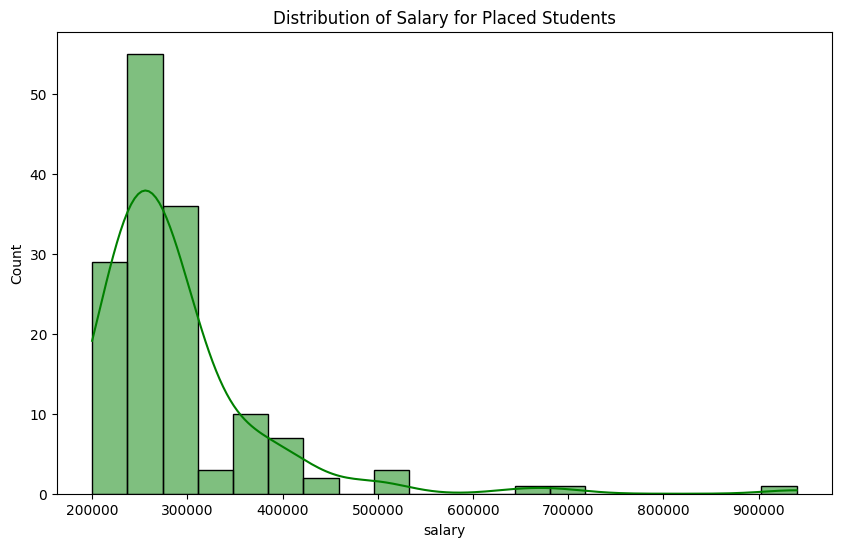

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data=my_data1[my_data1['status'] == 'Placed'], x='salary', bins=20, kde=True, color='green')
plt.title('Distribution of Salary for Placed Students')
plt.show()

In [9]:

y=full_data.status
X=full_data.drop(['status'],axis=1)
placed=full_data.salary_mark[y==1]
not_placed=full_data.salary_mark[y==0]
print(placed.mean())
print(not_placed.mean())

1.0
0.0


# 'Salary column has direct impact on Status column '

<Axes: xlabel='salary_mark', ylabel='status'>

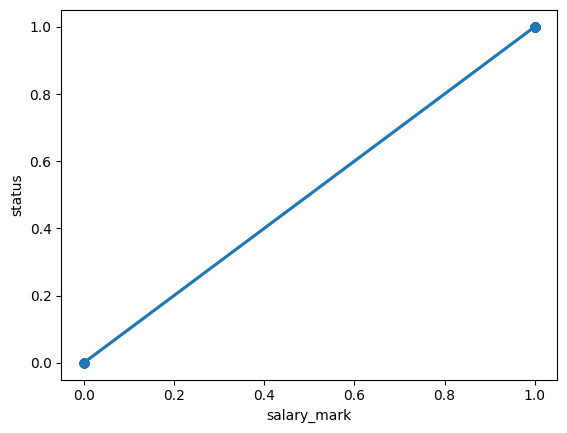

In [10]:
sns.regplot(x=full_data['salary_mark'],y=full_data['status'])

In [11]:
final_data=full_data.drop(['salary','salary_mark'],axis=1)

<Axes: >

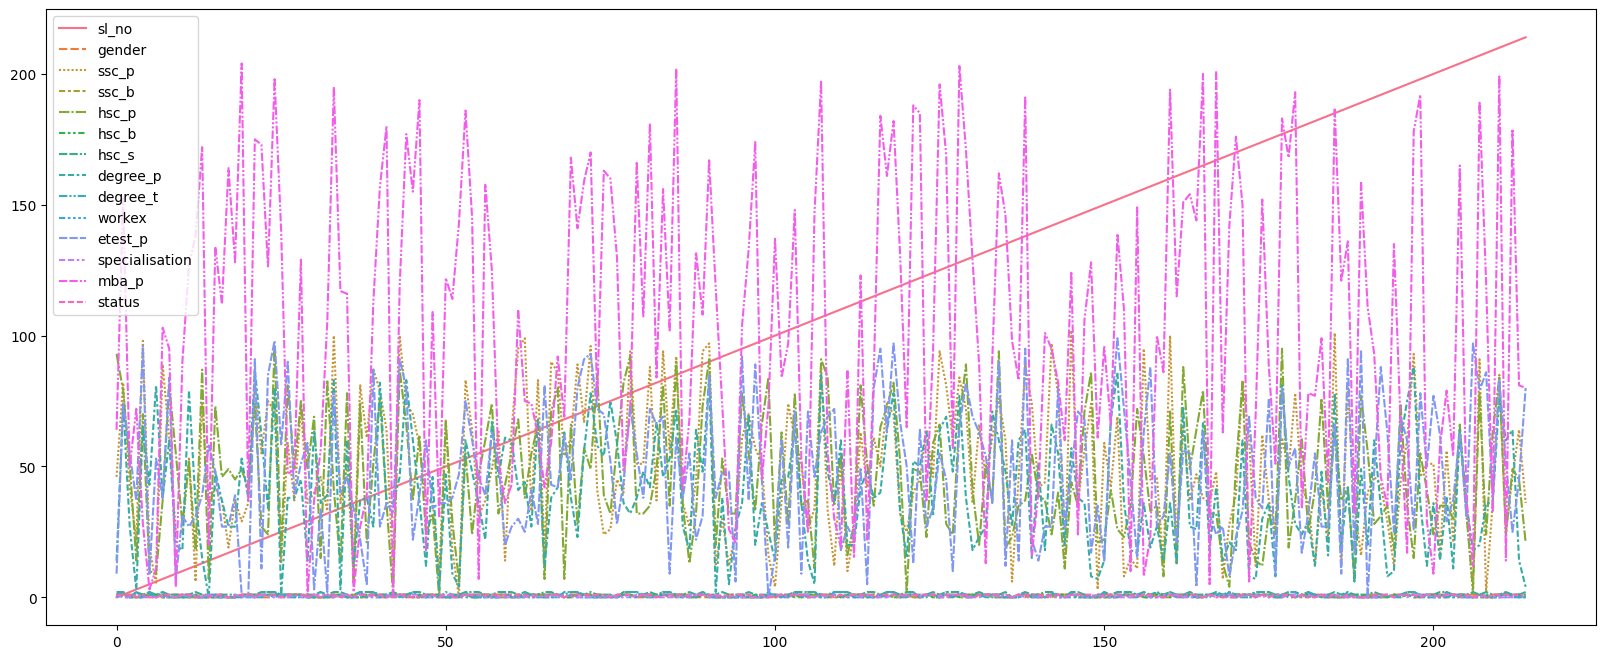

In [12]:
plt.figure(figsize=(20,8))
sns.lineplot(data=final_data)

<Figure size 1200x1000 with 0 Axes>

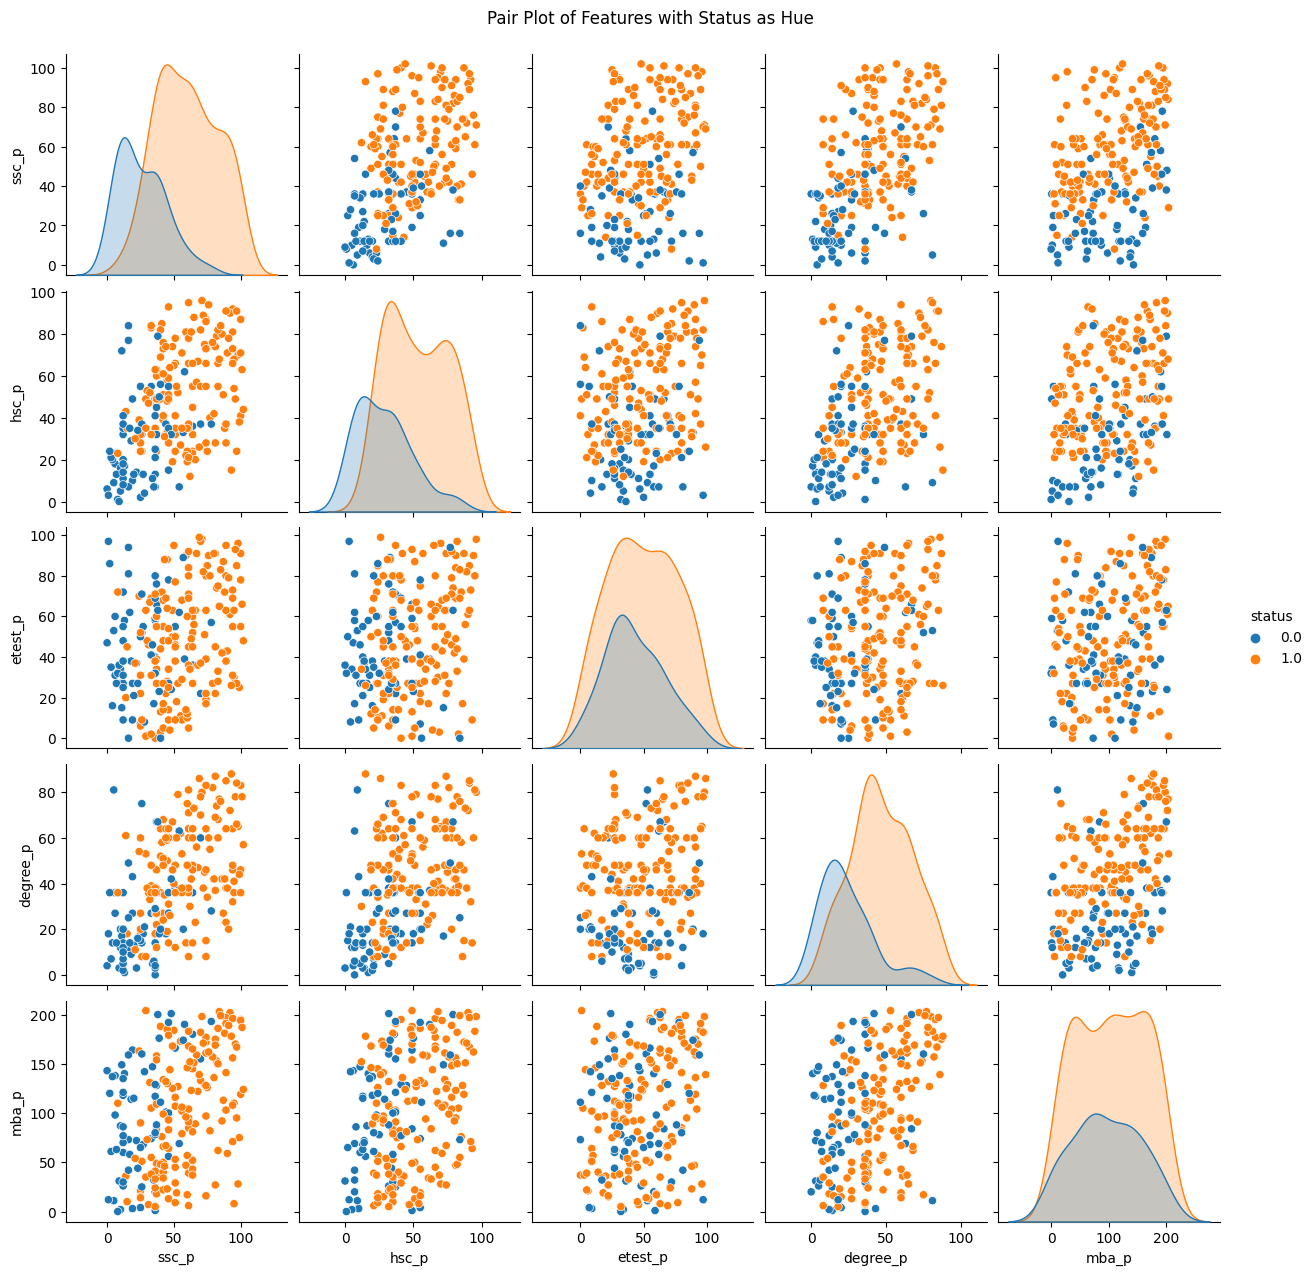

In [13]:
plt.figure(figsize=(12,10))
sns.pairplot(final_data[['ssc_p','hsc_p','etest_p','degree_p','mba_p','status']],hue='status')
plt.suptitle('Pair Plot of Features with Status as Hue',y=1.02)
plt.show()


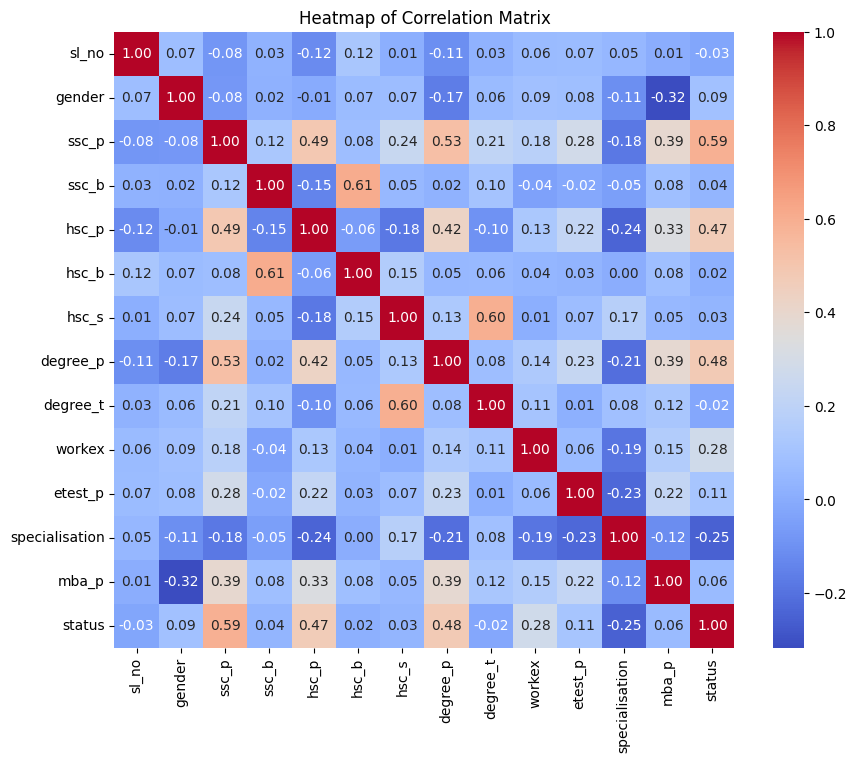

In [14]:
correlation_matrix = final_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()

Text(0.5, 1.0, 'MBA Percentage')

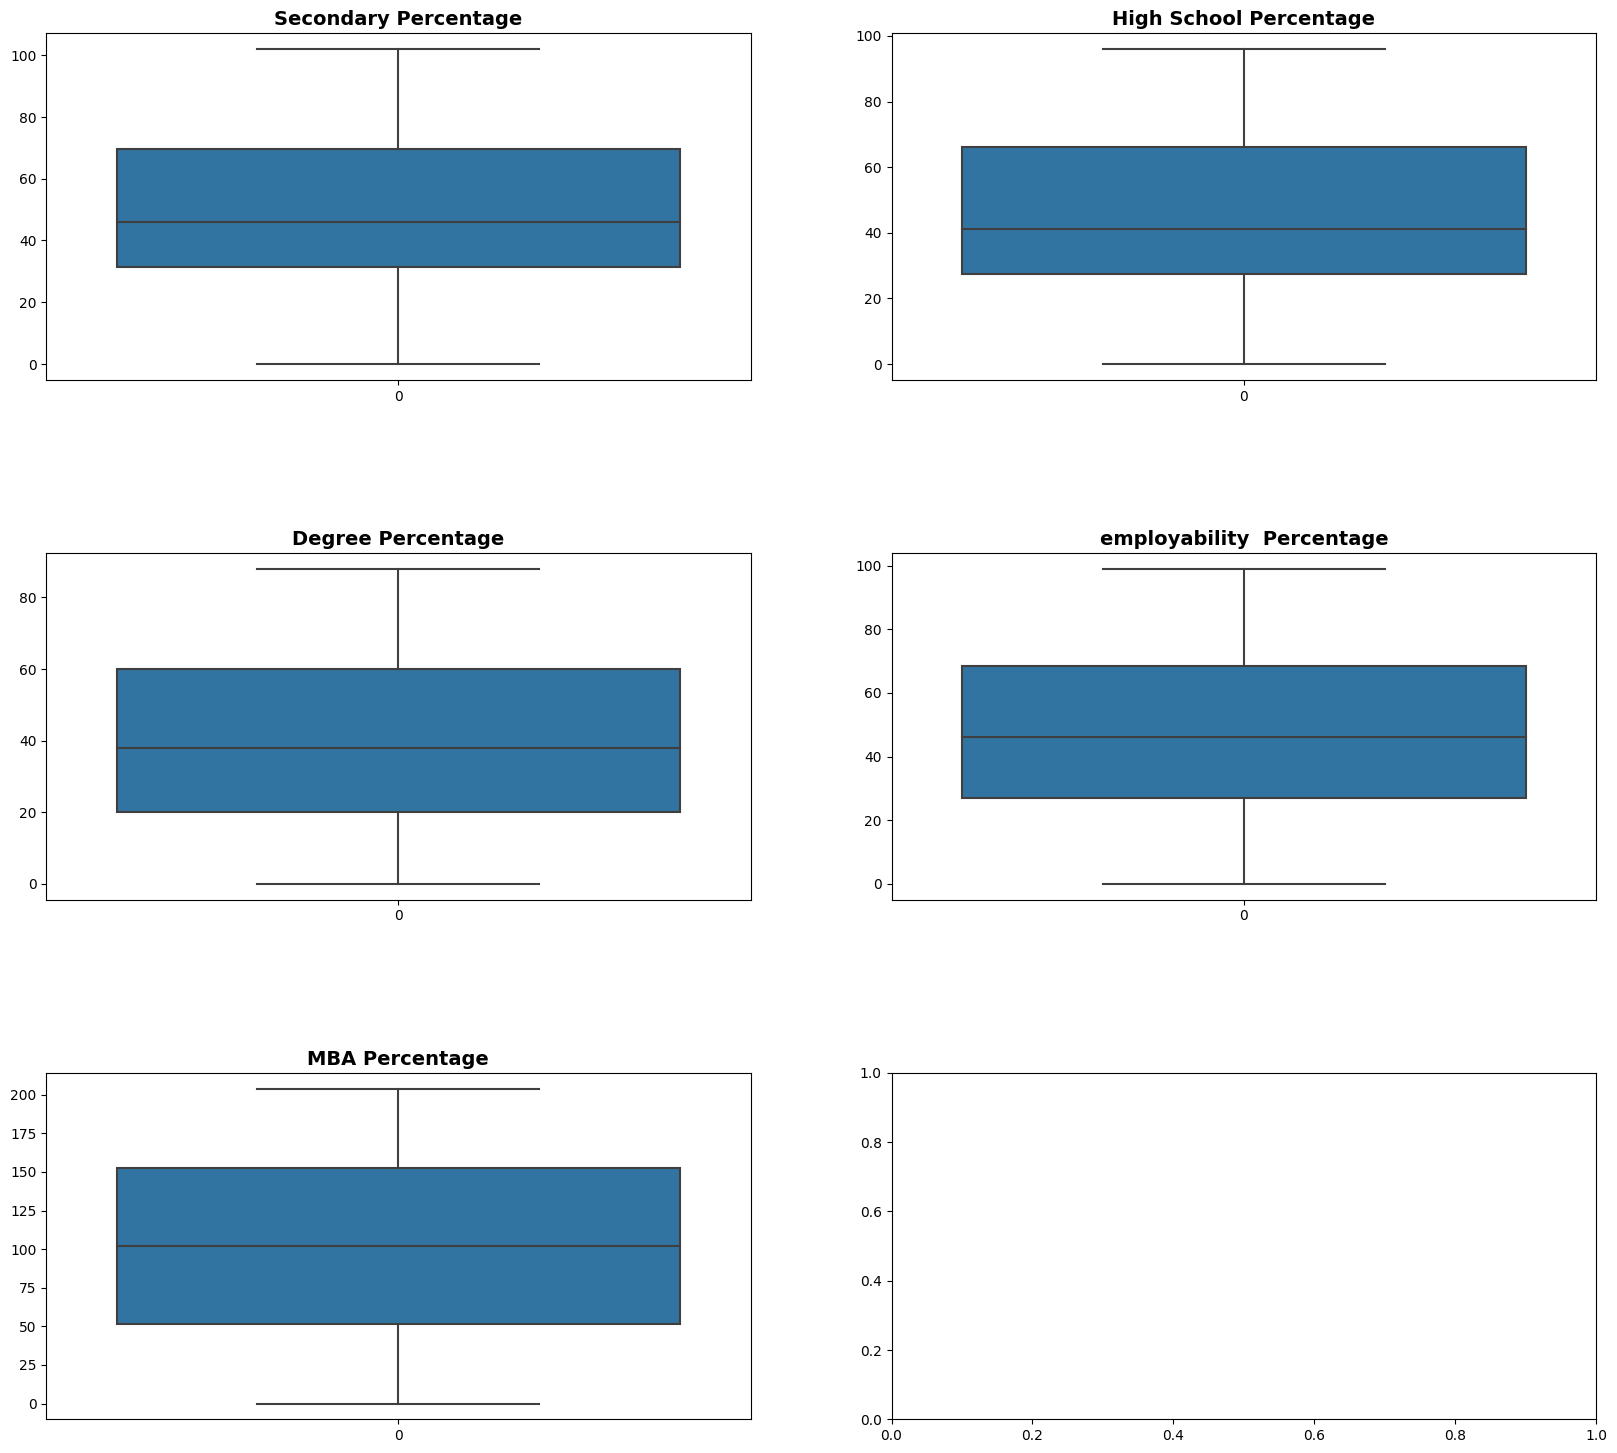

In [15]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,18))
fig.subplots_adjust(hspace=0.5)
sns.boxplot(final_data['ssc_p'],ax=axes[0,0]).set_title('Secondary Percentage',fontweight='bold',fontsize=14)
sns.boxplot(final_data['hsc_p'],ax=axes[0,1]).set_title('High School Percentage',fontweight='bold',fontsize=14)
sns.boxplot(final_data['degree_p'],ax=axes[1,0]).set_title('Degree Percentage',fontweight='bold',fontsize=14)
sns.boxplot(final_data['etest_p'],ax=axes[1,1]).set_title('employability  Percentage',fontweight='bold',fontsize=14)
sns.boxplot(final_data['mba_p'],ax=axes[2,0]).set_title('MBA Percentage',fontweight='bold',fontsize=14)

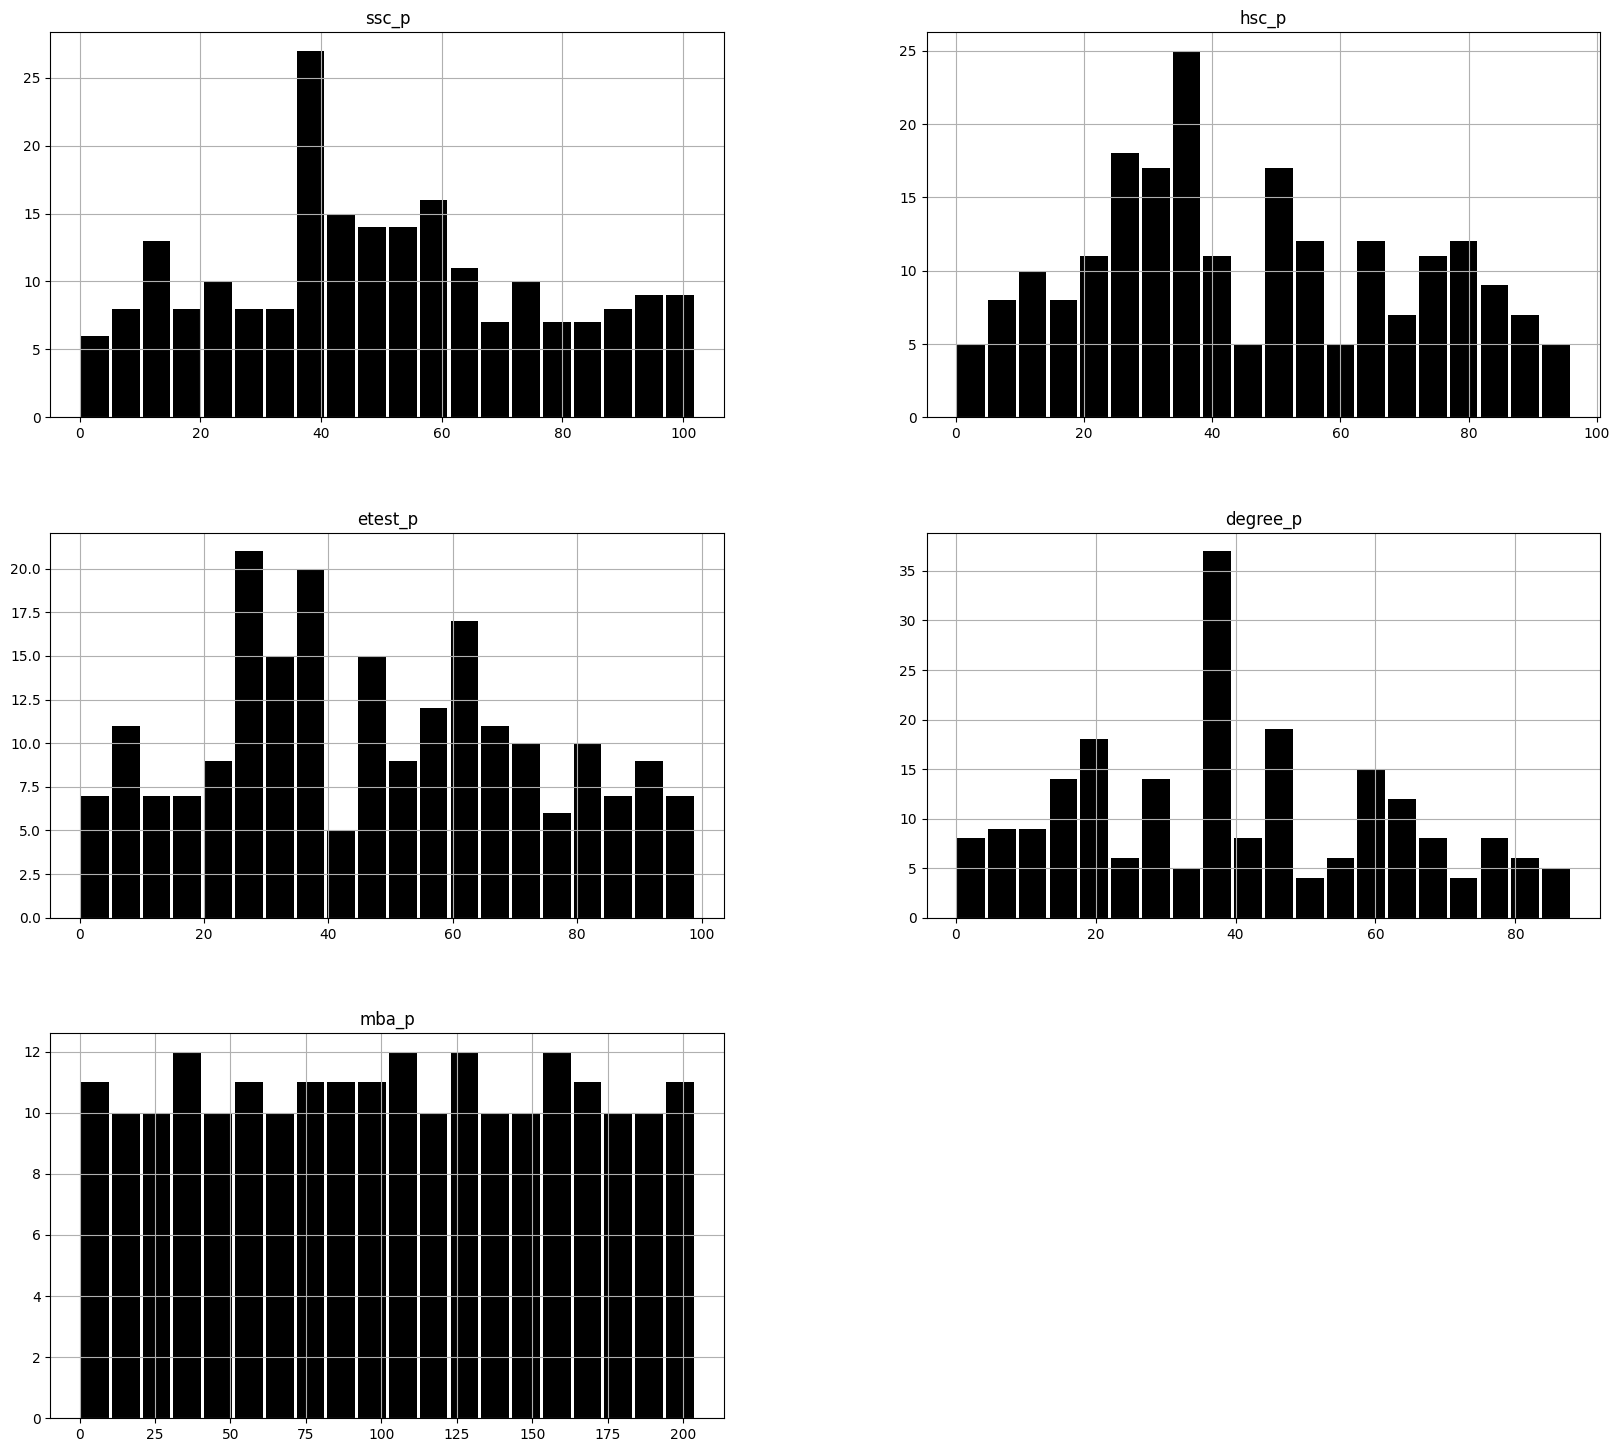

In [16]:
final_data[['ssc_p','hsc_p','etest_p','degree_p','mba_p']].hist(figsize=(20,18),bins=20, color='black',rwidth=0.9)
plt.show()

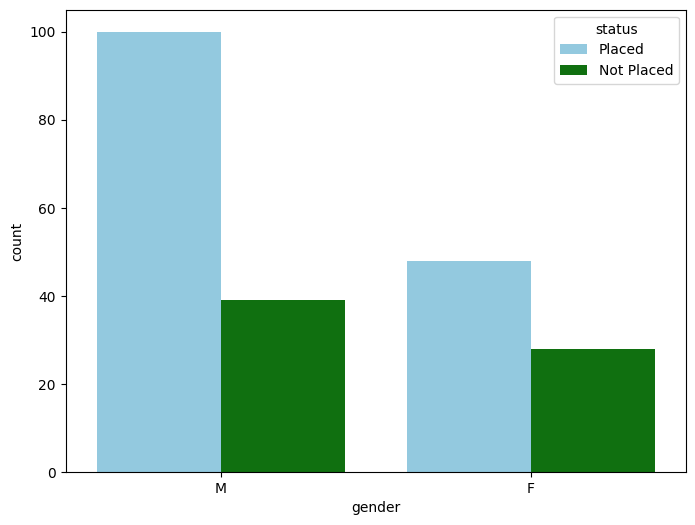

In [17]:
plt.figure(figsize=(8,6))
ax = sns.countplot(data=my_data1, x= my_data1['gender'], hue=my_data1['status'], palette=['skyblue','green'])

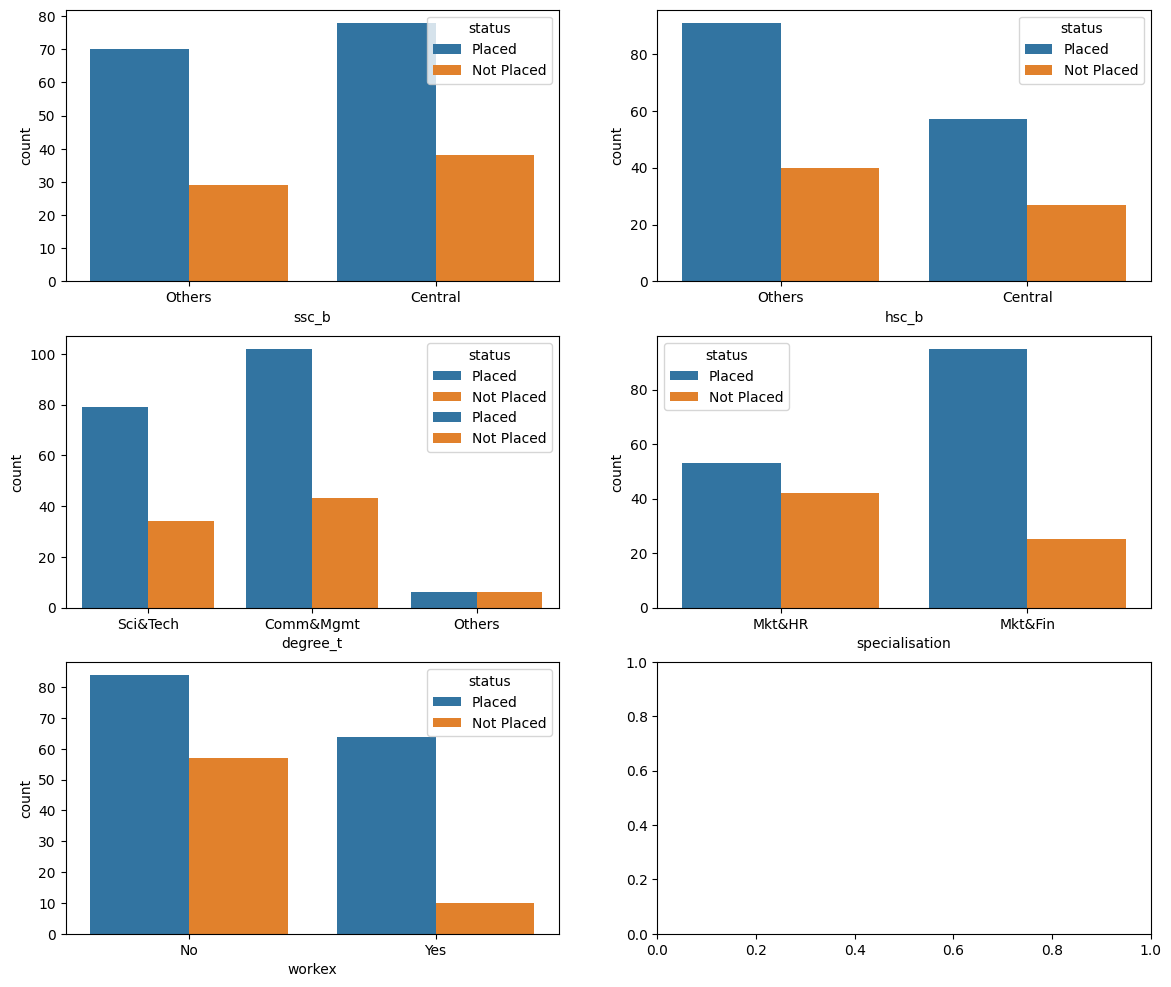

In [18]:
fig, axes = plt.subplots(nrows= 3, ncols=2, figsize=(14,12))
x1=sns.countplot(x=my_data1['ssc_b'],hue=my_data1['status'], ax=axes[0,0])
x2=sns.countplot(x=my_data1['hsc_b'], hue=my_data1['status'], ax=axes[0,1])
x3=sns.countplot(x=my_data1['hsc_s'], hue=my_data1['status'], ax=axes[1,0])
x4=sns.countplot(x=my_data1['degree_t'], hue=my_data1['status'], ax=axes[1,0])
x5=sns.countplot(x=my_data1['specialisation'], hue=my_data1['status'], ax=axes[1,1])
x6=sns.countplot(x=my_data1['workex'], hue=my_data1['status'], ax=axes[2,0])

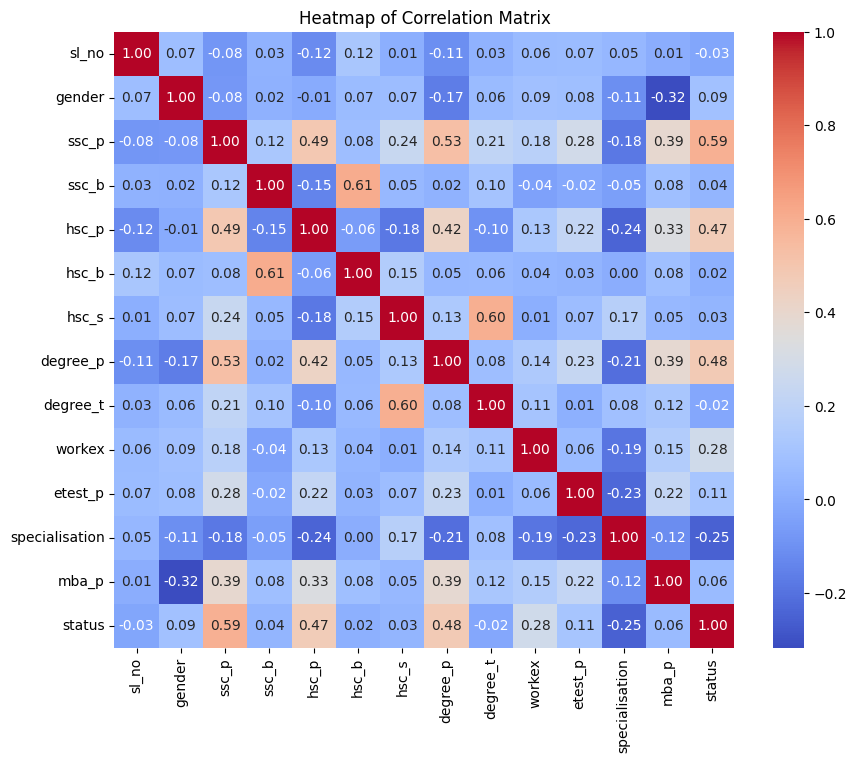

In [19]:
correlation_matrix = final_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()

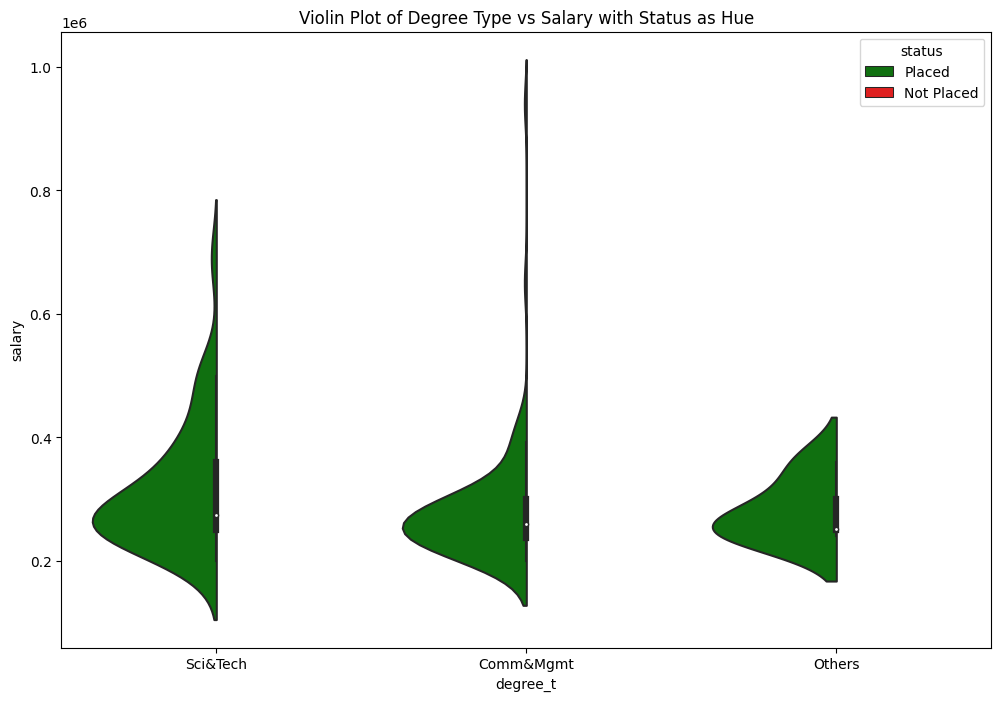

In [20]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=my_data1, x='degree_t', y='salary', hue='status', split=True, palette={"Placed": "green", "Not Placed": "red"})
plt.title('Violin Plot of Degree Type vs Salary with Status as Hue')
plt.show()